In [1]:
import numpy as np
import matplotlib.pyplot as plt

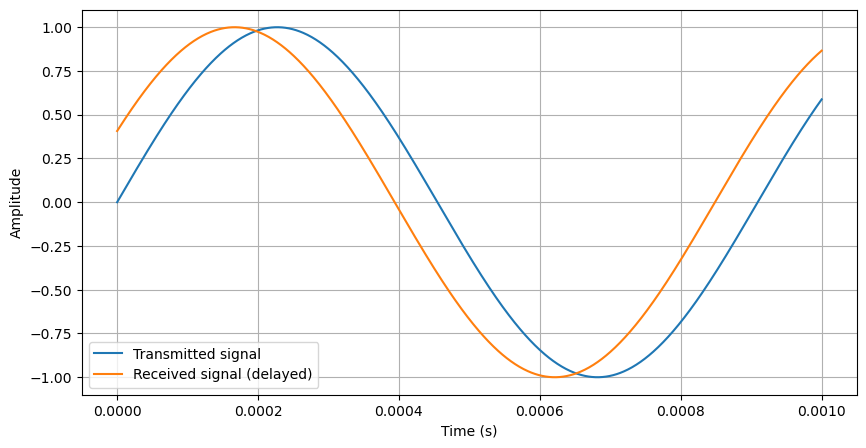

In [2]:
# Parameters
A0 = 1.0            # amplitude
fc = 1000           # carrier frequency (Hz)
c = 3e8             # speed of sound
Rt = 10000            # distance between transmitter and object
Rr = 10000            # distance between received and object
fs = 1e6            # sampling rate (Hz) -> increased
T = 0.001          # signal duration (s)


t = np.arange(0, T, 1/fs)

# frequency for delw(audio signal)
fa = 100  

# Transmitted signal (modulated)
s = A0 * np.sin(((2*np.pi*fc) + (2*np.pi*fa))*t)

# delay
R = Rt + Rr
tau = R / c 

# Received signal(with delay)
t_delayed = t - tau
r = A0 * np.sin((((2*np.pi*fc) + (2*np.pi*fa))*t) +((2*np.pi*fc*tau)) )

# Plot
plt.figure(figsize=(10,5))
plt.plot(t, s, label="Transmitted signal")
plt.plot(t, r, label="Received signal (delayed)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()



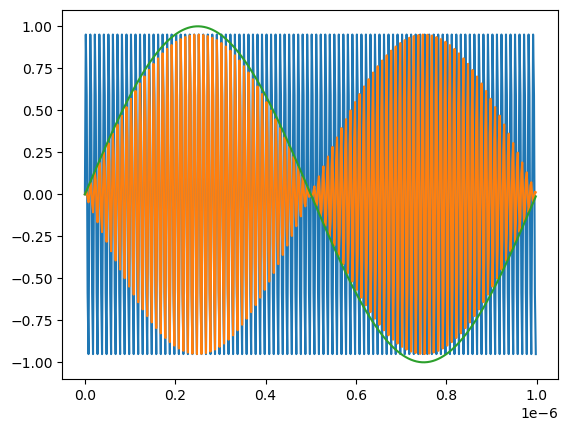

In [3]:
A0 = 1.0            # amplitude
fc = 100e6           # carrier frequency (Hz)
c = 3e8             # speed of sound
Rt = 10000            # distance between transmitter and object
Rr = 10000            # distance between received and object
T = 1e-6        # signal duration (s)
fa = 1e6
fs = 500e6
t = np.arange(0, T, 1/fs)
wa = 2*np.pi*fa
wc = 2*np.pi*fc
B=np.sin(wa*t)
transmitted_signal = B*A0*np.sin(t*wc)

plt.plot(t,A0*np.sin(t*wc))
plt.plot(t,transmitted_signal)
plt.plot(t,B)

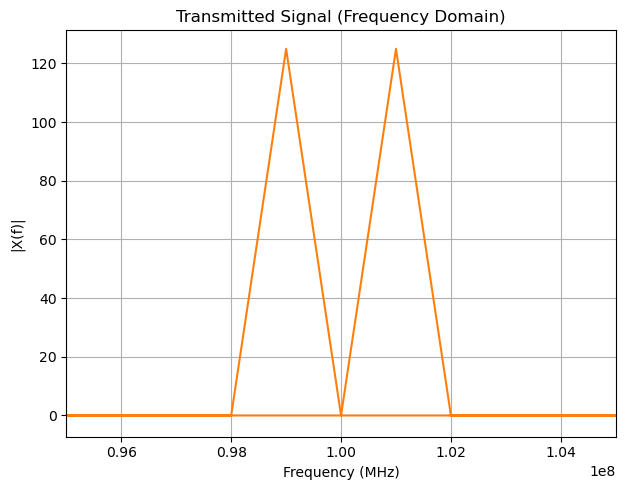

In [15]:
N = len(transmitted_signal)
X = np.fft.fft(transmitted_signal)
f = np.fft.fftfreq(N, 1/fs)     
fshift = np.fft.fftshift(f)

# Plot
plt.figure(figsize=(12,5))

# Time domain
plt.subplot(1,2,1)
plt.plot(t*1e6, transmitted_signal)  
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Transmitted Signal (Time Domain)")

# Frequency domain
plt.plot(f, np.abs(X))  
plt.xlabel("Frequency (MHz)")
plt.ylabel("|X(f)|")
plt.xlim(95*1e6,105*1e6)
plt.title("Transmitted Signal (Frequency Domain)")  
plt.grid(True)


plt.tight_layout()
plt.show()

(-95000000.0, -105000000.0)

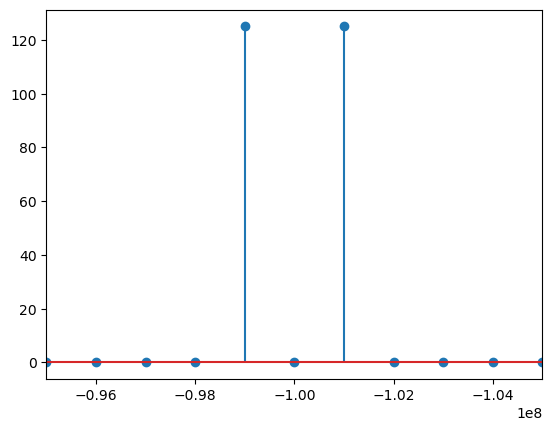

In [21]:
plt.stem(f, np.abs(X))
plt.xlim(-95*1e6,-105*1e6)